In [1]:
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit_aer import AerSimulator 
from qiskit.utils import QuantumInstance
from qubap.qiskit.luciano.costfunc_barren_plateaus import global2local, test_hamiltonian, VQE_adiabatic 
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation, classical_solver
from qubap.qiskit.jorge.tools import SPSA_calibrated
from qubap.qiskit.jorge.tools import make_array_and_callback

In [3]:
num_qubits = 8
hamiltonian_global = test_hamiltonian( num_qubits, [1,2,3] )
hamiltonian_global

PauliSumOp(SparsePauliOp(['XXXXXXXX', 'YYYYYYYY', 'ZZZZZZZZ'],
              coeffs=[1.+0.j, 2.+0.j, 3.+0.j]), coeff=1.0)

In [4]:
classical_solution = classical_solver( hamiltonian_global ).eigenvalue
classical_solution

-4.000000000000004

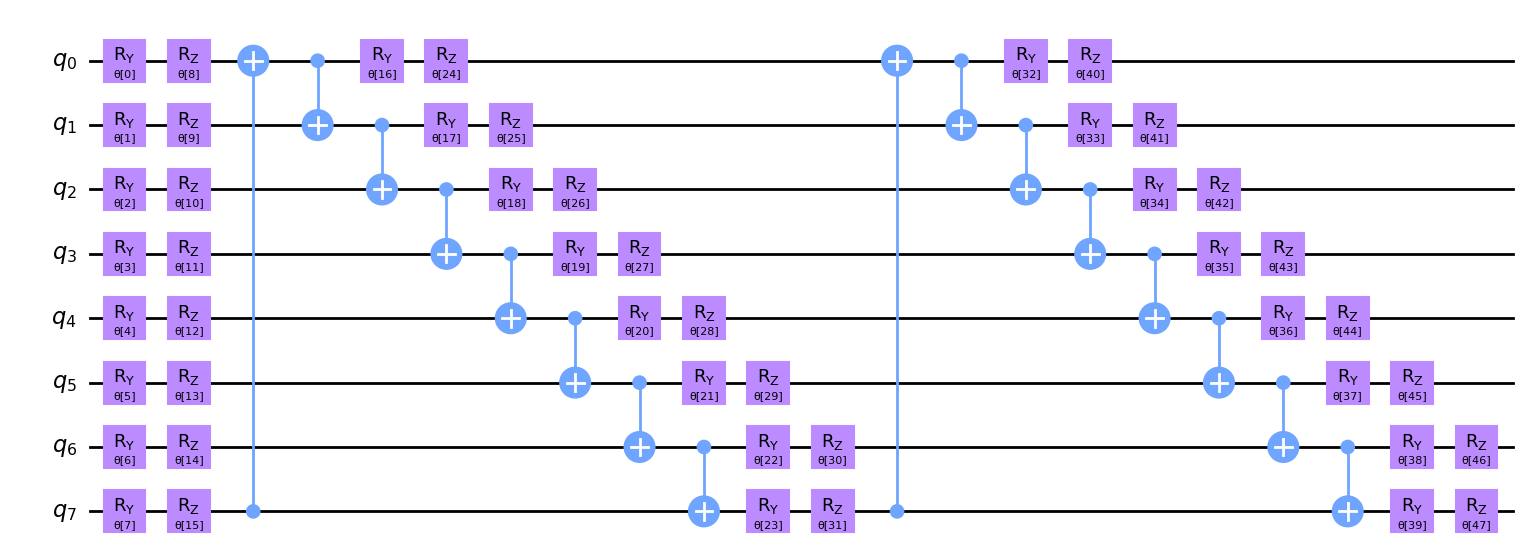

In [5]:
reps   = 2
ansatz = EfficientSU2( num_qubits, ['ry','rz'], 'circular', reps ).decompose()
ansatz.draw('mpl') 

In [6]:
npars = 2*num_qubits*( reps + 1 )
pars  = np.random.randn( npars ) * np.pi
quantum_instance = QuantumInstance( AerSimulator() , shots = 2**4 )

In [7]:
energy_evaluation( hamiltonian_global, ansatz, pars, quantum_instance )

0.24999999999999997

In [8]:
num_iters = 300

In [9]:
results_global = VQE( hamiltonian_global, ansatz, pars, num_iters, quantum_instance )
data_global    = [ energy_evaluation( hamiltonian_global, ansatz, x, AerSimulator(method='statevector') ) for x in results_global ]

In [10]:
results_adiabatic = VQE_adiabatic( hamiltonian_global, ansatz, pars, num_iters, quantum_instance ) 
data_adiabatic    = [ energy_evaluation( hamiltonian_global, ansatz, x, AerSimulator(method='statevector') ) for x in results_adiabatic ]

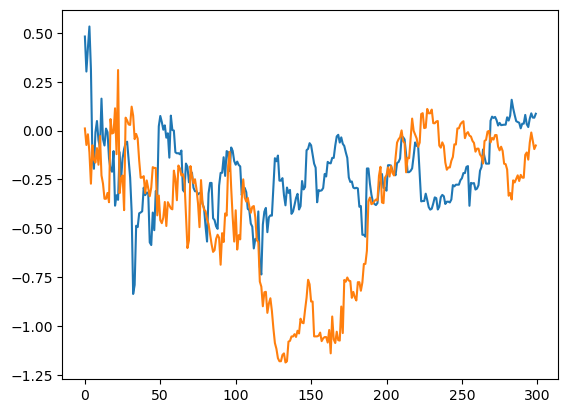

In [11]:
plt.plot( data_global )
plt.plot( data_adiabatic )
# plt.hlines( classical_solution, 0, num_iters, 'r' )